In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zomato= pd.read_csv('Zomato data .csv')

In [3]:
zomato.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet


In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
zomato.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
zomato.shape

(148, 7)

In [7]:
zomato[['rate','out_of']]=zomato['rate'].str.split('/',expand=True)


In [8]:
zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),out_of
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,5
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,5
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,5
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,5
4,Grand Village,No,No,3.8,166,600,Buffet,5
...,...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining,5
144,New Indraprasta,No,No,3.3,0,150,Dining,5
145,Anna Kuteera,Yes,No,4.0,771,450,Dining,5
146,Darbar,No,No,3.0,98,800,Dining,5


In [9]:
zomato.rename(columns={'out_of':'rate_out_of'})

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),rate_out_of
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,5
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,5
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,5
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,5
4,Grand Village,No,No,3.8,166,600,Buffet,5
...,...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining,5
144,New Indraprasta,No,No,3.3,0,150,Dining,5
145,Anna Kuteera,Yes,No,4.0,771,450,Dining,5
146,Darbar,No,No,3.0,98,800,Dining,5


# 1) What type of restaurant do the majority of customers order from?

In [10]:
type=zomato.groupby('listed_in(type)')['listed_in(type)'].value_counts().sort_values(ascending=False)

Text(0.5, 1.0, 'type of restaurant with max orders')

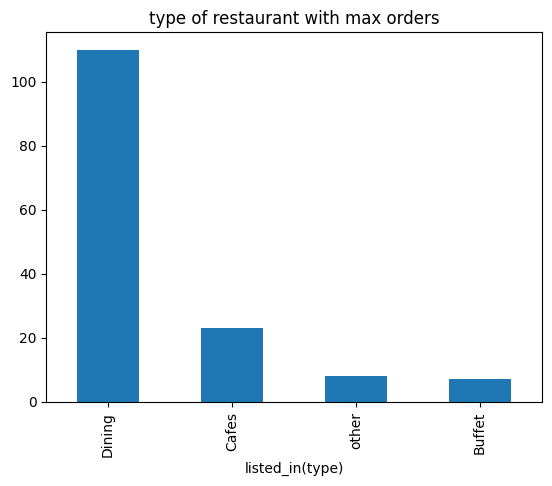

In [11]:
type.plot(kind='bar', )
plt.title('type of restaurant with max orders')

Text(0.5, 1.0, 'type of restaurant with max orders')

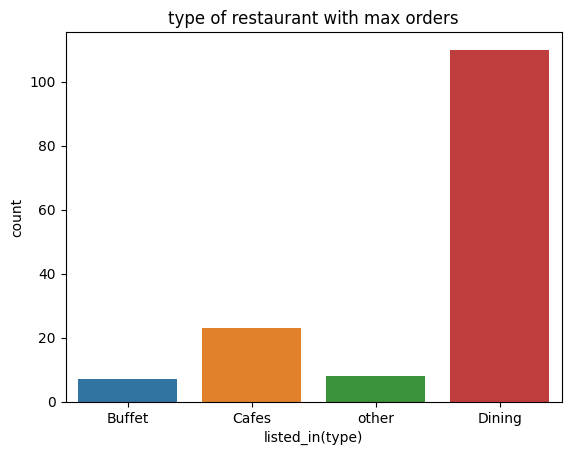

In [12]:
# second method
sns.countplot(data=zomato,x='listed_in(type)',hue='listed_in(type)')
plt.title('type of restaurant with max orders')

# 2 How many votes has each type of restaurant received from customers?

In [13]:
votes=zomato.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'votes by different types of restaurant')

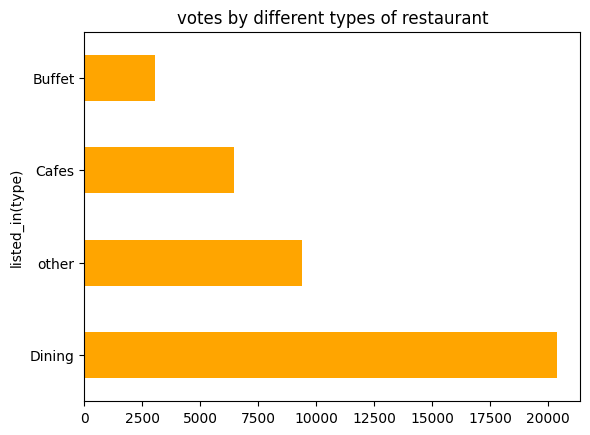

In [14]:
votes.plot(kind='barh',color='orange')
plt.title('votes by different types of restaurant')

# 3) What are the ratings that the majority of restaurants have received?

Text(0.5, 1.0, 'major ratings done by customers to restaurants')

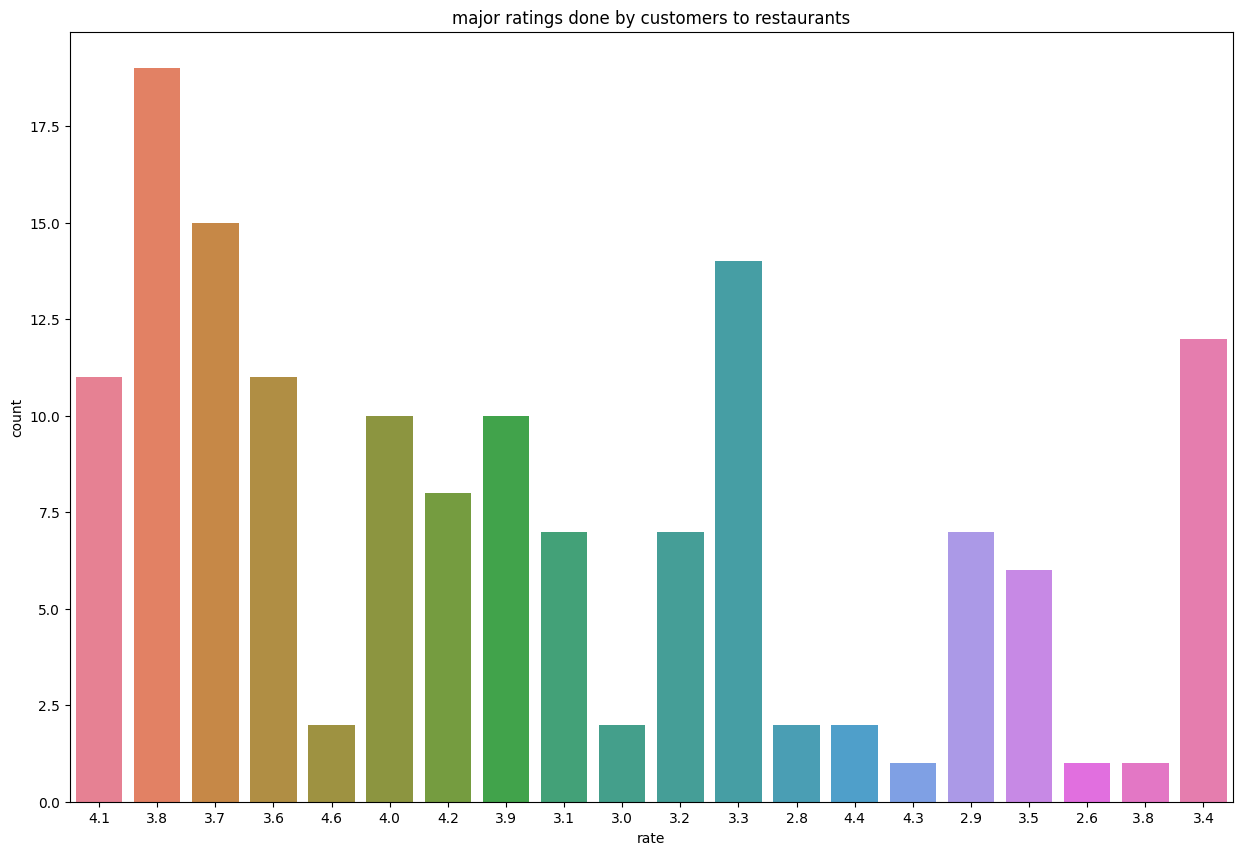

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=zomato,x='rate',hue='rate')
plt.title('major ratings done by customers to restaurants')

# 4)Zomato has observed that most couples order most of their food online. What is their
# average spending on each order?


In [20]:
 temp_z=zomato[zomato['online_order']=='Yes']


In [21]:
temp_z['approx_cost(for two people)'].mean()

np.float64(510.3448275862069)

In [22]:
#  changing format of rate column into float
zomato['rate']=zomato['rate'].astype(float)


# 5) Which mode (online or offline) has received the maximum rating?

In [23]:
df=zomato.groupby('online_order')['rate'].sum().sort_values(ascending=False)

<Axes: xlabel='online_order', ylabel='total_rating'>

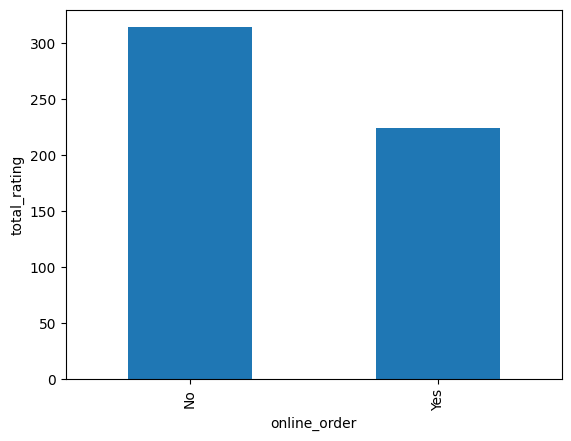

In [27]:
df.plot(kind='bar',ylabel='total_rating')

# wahat are numnber of orders according offline and online?

<Axes: xlabel='online_order', ylabel='count'>

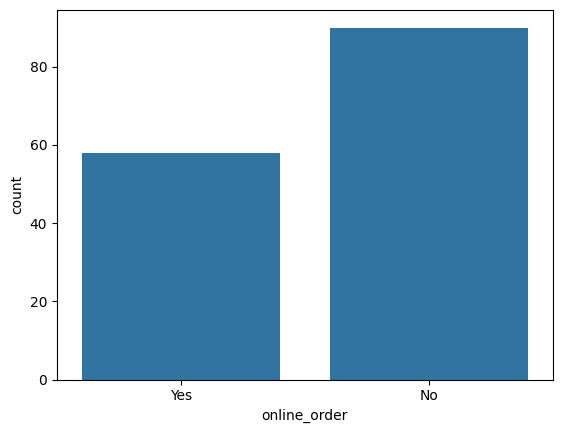

In [72]:
sns.countplot(data=zomato,x='online_order')

# 6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [47]:
offline_order=zomato[zomato['online_order']=='No']

In [48]:
offline_order

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),out_of
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,5
4,Grand Village,No,No,3.8,166,600,Buffet,5
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet,5
13,Caf-Eleven,No,No,4.0,424,450,Cafes,5
18,T3H Cafe,No,No,3.9,93,300,Cafes,5
...,...,...,...,...,...,...,...,...
141,Swaada Healthy Kitchen,No,No,3.3,0,350,Dining,5
142,Gawdaru Mane Beriyani,No,No,3.3,0,300,Dining,5
143,Melting Melodies,No,No,3.3,0,100,Dining,5
144,New Indraprasta,No,No,3.3,0,150,Dining,5


Text(0.5, 1.0, 'type of restaurant with more offline orders')

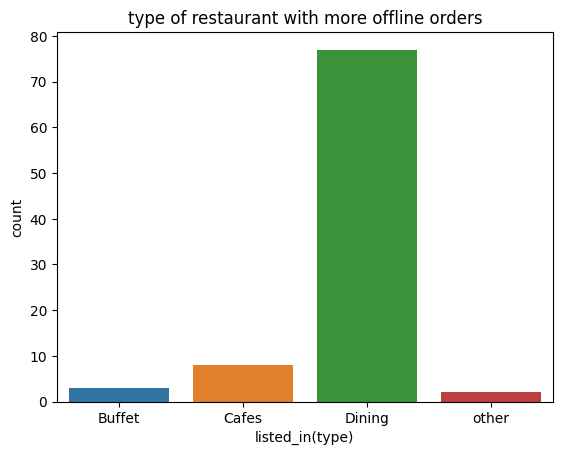

In [76]:
sns.countplot(data=offline_order,x='listed_in(type)',hue='listed_in(type)')
plt.title('type of restaurant with more offline orders')


In [95]:

online_order=zomato[zomato['online_order']=='Yes']

Text(0.5, 1.0, 'type of restaurant with more online orders')

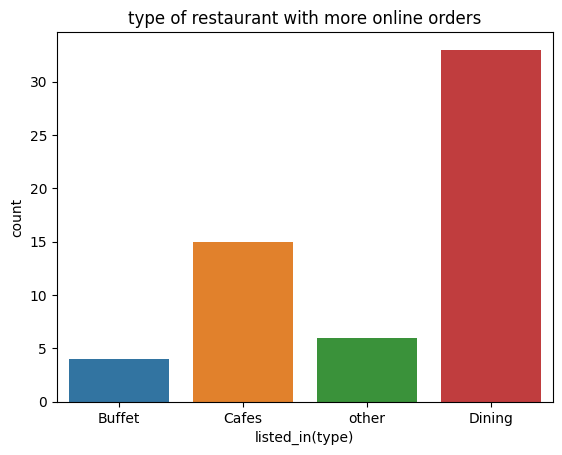

In [96]:
sns.countplot(data=online_order,x='listed_in(type)',hue='listed_in(type)')
plt.title('type of restaurant with more online orders')

Text(0.5, 1.0, 'comparision of restaurant with offline and online order')

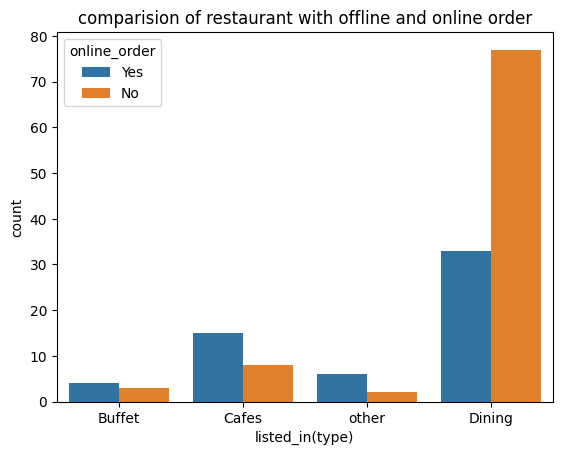

In [104]:
# second method
sns.countplot(data=zomato, x='listed_in(type)', hue='online_order')
plt.title('comparision of restaurant with offline and online order')

In [ ]:
# projects end